<a href="https://colab.research.google.com/github/vishakhun/GDPR_Prediction/blob/main/GDPR_Customer_Request_Prediction_Model_(ride_hailing_company).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GDPR Customer Request Prediction Model - Ride-hailing company

## Introduction
This project aims to predict whether customer service requests are related to GDPR compliance using machine learning models. This capability can help organizations respond appropriately to privacy-related inquiries, ensuring compliance with data protection laws.

## Project Description
###Objective:
Develop a predictive model that can classify customer service requests based on whether they pertain to GDPR issues.
###Models Utilized:
1. Random Forest
2. XGBoost

###Data:
The dataset include customer requests in a ride-hailing company with fields like Request ID, Request Type, Request Description and randomly created using LLM


### System Architecture
*   Data Preprocessing: Cleansing and vectorizing text data using TF-IDF.
*   Model Training: Training several machine learning models and selecting the best performer based on evaluation metrics.
* Prediction Module: Deploying the selected model to predict the category of new requests.

---

#####*Vishakh U N*
* vishakhun@gmail.com
* [Linkedin](https://www.linkedin.com/in/vishakhun/)
* [Github](https://www.github.com/vishakhun/)

###Import/Install necessary libraries

In [1]:
%%capture
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
try:
    import xgboost
except ImportError:
    !pip install

### Load the dataset

In [2]:
data = pd.read_csv('/content/sample_data/balanced_customer_service_requests_dataset.csv')

In [3]:
data

,Request ID,Customer ID,Request Type,Request Description,Request Status,Creation Date,Resolution Date
0,3305,6136,Payment Issue,I can't update my payment information in the app.,Closed,2021-02-10,NaN
1,5007,1361,Payment Issue,The ride fare was higher than the estimated fare.,Closed,2023-01-31,NaN
2,4382,6915,Payment Issue,"I received a ride cancellation fee, but I didn...",Open,2020-07-29,NaN
3,4262,2832,Payment Issue,My promo code was not applied to my ride.,Resolved,2021-07-03,2021-03-13
4,6480,3301,Payment Issue,"I received a ride cancellation fee, but I didn...",In Progress,2022-12-07,2021-06-11
...,...,...,...,...,...,...,...
10215,7479,6428,Account Issue,My ride history is not showing in the app.,Open,2021-12-28,2020-09-03
10216,4111,6327,Account Issue,"I lost my wallet in the car, and the driver is...",Open,2022-03-03,NaN
10217,9017,3741,Account Issue,I can't log into my account.,Resolved,2023-11-02,2021-11-19
10218,5107,5072,Account Issue,My ride history is not showing in the app.,Open,2023-06-30,NaN


###Request Type

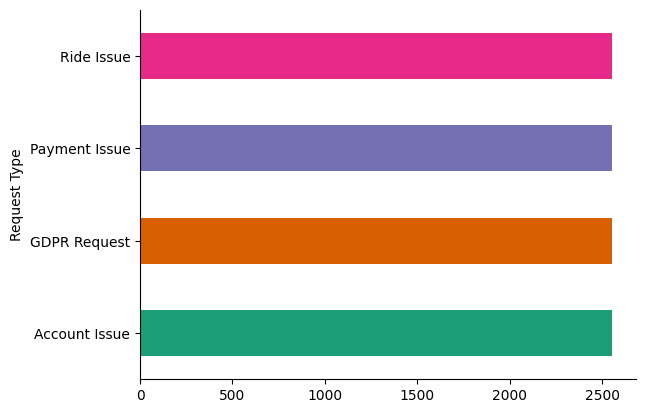

In [4]:
data.groupby('Request Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
data[data['Request Type'] == 'GDPR Request']

,Request ID,Customer ID,Request Type,Request Description,Request Status,Creation Date,Resolution Date
5110,3413,2441,GDPR Request,I do not consent to my data being used for ana...,Open,2021-11-27,2020-04-04
5111,5166,2958,GDPR Request,Can I get a summary of all my interactions and...,Resolved,2021-01-17,2021-10-29
5112,4420,3515,GDPR Request,I request the deletion of all data you have ab...,Resolved,2023-02-05,NaN
5113,4256,3915,GDPR Request,I request that you cease processing my data fo...,Closed,2023-06-26,2022-11-10
5114,6496,8623,GDPR Request,I request human intervention in decisions affe...,Resolved,2023-05-10,NaN
...,...,...,...,...,...,...,...
7660,2327,6611,GDPR Request,I want my user profile and associated data to ...,In Progress,2022-10-30,NaN
7661,7622,4634,GDPR Request,I object to decisions being made about me sole...,Resolved,2022-09-27,NaN
7662,3948,6733,GDPR Request,I request that you stop processing my data bas...,Open,2023-08-24,NaN
7663,2708,7332,GDPR Request,Please exclude my data from automated profiling.,Closed,2020-03-03,2023-06-19


###Data Preprocessing

In [6]:
# Create a 'GDPR_Related' column based on the 'Request Type'
data['GDPR_Related'] = data['Request Type'].apply(lambda x: x == 'GDPR Request')


def preprocess_text(text):
    """Convert text to lowercase and remove non-alphanumeric characters."""
    text = text.lower()
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    return text
# Apply preprocessing to the 'Request Description'
data['Processed Description'] = data['Request Description'].apply(preprocess_text)

# Feature Extraction
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data['Processed Description'])
y = data['GDPR_Related']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training


In [ ]:
# Model Training
# Define models

models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss', seed=42)
}

# Train models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

### Prediction Function

In [ ]:
def predict_gdpr(description):
    """Generate GDPR-related predictions from different models for a given description."""
    processed_description = preprocess_text(description)
    tfidf_description = vectorizer.transform([processed_description])
    print(f"Prediction results for: '{description}'")
    for name, model in models.items():
        prediction = model.predict(tfidf_description)
        print(f"{name}: {'GDPR-related' if prediction else 'Not GDPR-related'}")

#User Input and Prediction

To determine the best fit for our requirements, we have evaluated two models, consistently finding that the Random Forest model provides the most reliable classification results.

However, there are instances where even the Random Forest model falls short, highlighting the need for periodic retraining through supervised learning and adjustments in hyperparameters to enhance its performance.

This ongoing model optimization will ensure our classifications remain accurate and effective over time.

In [ ]:
# Loop to continuously accept input
while True:
    user_input = input("Enter a customer service request description to predict (type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break
    predict_gdpr(user_input)
    print("\n")  # Print a newline for better separation of prediction sessions


Enter a customer service request description to predict (type 'exit' to quit): rude driver
Prediction results for: 'rude driver'
Random Forest: Not GDPR-related
XGBoost: Not GDPR-related


Enter a customer service request description to predict (type 'exit' to quit): delete my data
Prediction results for: 'delete my data'
Random Forest: GDPR-related
XGBoost: Not GDPR-related


Enter a customer service request description to predict (type 'exit' to quit): “I would like to receive a copy of all personal data you have about me, including my ride history and any recorded customer service interactions.”
Prediction results for: '“I would like to receive a copy of all personal data you have about me, including my ride history and any recorded customer service interactions.”'
Random Forest: GDPR-related
XGBoost: GDPR-related


Enter a customer service request description to predict (type 'exit' to quit): “Please correct my personal data in your records; my email address has changed from oldema